## TASK 4 - Face Mask Detection using Convolutional Neural Networks

Group Number: #INSERT HERE


In [1]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


CPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [2]:
data_module_simple = my_datamodule.DataModule(img_size=64, batch_size=64)

### 2. Simple Face Mask Detection CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [3]:
model_simple = my_model.MaskClassifier(name="mask_classifier_simple", img_size=64)
summary(model_simple, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Conv2d: 1-1                            [32, 32, 62, 62]          896
├─MaxPool2d: 1-2                         [32, 32, 31, 31]          --
├─Conv2d: 1-3                            [32, 32, 29, 29]          9,248
├─MaxPool2d: 1-4                         [32, 32, 14, 14]          --
├─Linear: 1-5                            [32, 1]                   6,273
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
Total mult-adds (M): 359.30
Input size (MB): 1.57
Forward/backward pass size (MB): 38.38
Params size (MB): 0.07
Estimated Total Size (MB): 40.02

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

# !!! TODO

#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [4]:
trainer_simple = my_trainer.Trainer(model_simple, data_module_simple)

# Comment out trainer.load_model and uncomment trainer.fit to retrain model
#trainer_simple.load_model()
trainer_simple.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 0 Training: Loss: 0.6697448492050171 Accuracy: 0.685353696346283
Epoch 0 Validation: Loss: 0.6341766119003296 Accuracy: 0.7512152791023254


Epoch 1: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 1 Training: Loss: 0.5866970419883728 Accuracy: 0.8121851682662964
Epoch 1 Validation: Loss: 0.5255240797996521 Accuracy: 0.820225715637207


Epoch 2: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 2 Training: Loss: 0.4630330801010132 Accuracy: 0.8615785241127014
Epoch 2 Validation: Loss: 0.39604488015174866 Accuracy: 0.8531250357627869


Epoch 3: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 3 Training: Loss: 0.3565942645072937 Accuracy: 0.8836709856987
Epoch 3 Validation: Loss: 0.3226245939731598 Accuracy: 0.8888888955116272


Epoch 4: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 4 Training: Loss: 0.30519741773605347 Accuracy: 0.8942593932151794
Epoch 4 Validation: Loss: 0.2933160066604614 Accuracy: 0.8929687142372131


Epoch 5: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 5 Training: Loss: 0.27556905150413513 Accuracy: 0.9047046899795532
Epoch 5 Validation: Loss: 0.2581859529018402 Accuracy: 0.9072916507720947


Epoch 6: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 6 Training: Loss: 0.25870999693870544 Accuracy: 0.9094551801681519
Epoch 6 Validation: Loss: 0.23602710664272308 Accuracy: 0.9201388955116272


Epoch 7: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 7 Training: Loss: 0.24806740880012512 Accuracy: 0.911401093006134
Epoch 7 Validation: Loss: 0.2237284630537033 Accuracy: 0.9240451455116272


Epoch 8: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 8 Training: Loss: 0.2374039590358734 Accuracy: 0.917439341545105
Epoch 8 Validation: Loss: 0.21794404089450836 Accuracy: 0.9309027791023254


Epoch 9: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 9 Training: Loss: 0.23530137538909912 Accuracy: 0.9191277623176575
Epoch 9 Validation: Loss: 0.21517355740070343 Accuracy: 0.9348090291023254


Epoch 10: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 10 Training: Loss: 0.22782368957996368 Accuracy: 0.9187271595001221
Epoch 10 Validation: Loss: 0.21048592031002045 Accuracy: 0.9348090291023254


Epoch 11: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 11 Training: Loss: 0.22590425610542297 Accuracy: 0.9214457273483276
Epoch 11 Validation: Loss: 0.20554596185684204 Accuracy: 0.9348090291023254


Epoch 12: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 12 Training: Loss: 0.21807861328125 Accuracy: 0.9254235625267029
Epoch 12 Validation: Loss: 0.1945119947195053 Accuracy: 0.9306423664093018


Epoch 13: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 13 Training: Loss: 0.21588902175426483 Accuracy: 0.9230197072029114
Epoch 13 Validation: Loss: 0.1901845932006836 Accuracy: 0.9360242486000061


Epoch 14: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 14 Training: Loss: 0.21277287602424622 Accuracy: 0.9259100556373596
Epoch 14 Validation: Loss: 0.19092325866222382 Accuracy: 0.9387152791023254


Epoch 15: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 15 Training: Loss: 0.21071745455265045 Accuracy: 0.926453709602356
Epoch 15 Validation: Loss: 0.18708445131778717 Accuracy: 0.9279513955116272


Epoch 16: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.73it/s]


Epoch 16 Training: Loss: 0.2092077136039734 Accuracy: 0.9266541004180908
Epoch 16 Validation: Loss: 0.1805950403213501 Accuracy: 0.9386284351348877


Epoch 17: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  3.00it/s]


Epoch 17 Training: Loss: 0.20562943816184998 Accuracy: 0.9254521727561951
Epoch 17 Validation: Loss: 0.17924684286117554 Accuracy: 0.9438367486000061


Epoch 18: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 18 Training: Loss: 0.20096853375434875 Accuracy: 0.9288862347602844
Epoch 18 Validation: Loss: 0.17594002187252045 Accuracy: 0.9425346851348877


Epoch 19: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 19 Training: Loss: 0.2011370211839676 Accuracy: 0.928600013256073
Epoch 19 Validation: Loss: 0.17605261504650116 Accuracy: 0.9438367486000061


Epoch 20: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 20 Training: Loss: 0.19591206312179565 Accuracy: 0.9276556968688965
Epoch 20 Validation: Loss: 0.17281688749790192 Accuracy: 0.9451388716697693


Epoch 21: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 21 Training: Loss: 0.19436593353748322 Accuracy: 0.9261103272438049
Epoch 21 Validation: Loss: 0.16972829401493073 Accuracy: 0.9412326216697693


Epoch 22: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.05it/s]


Epoch 22 Training: Loss: 0.19106172025203705 Accuracy: 0.9295158386230469
Epoch 22 Validation: Loss: 0.17394132912158966 Accuracy: 0.9465277791023254


Epoch 23: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 23 Training: Loss: 0.18864451348781586 Accuracy: 0.9292868375778198
Epoch 23 Validation: Loss: 0.16806431114673615 Accuracy: 0.949131965637207


Epoch 24: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 24 Training: Loss: 0.18792149424552917 Accuracy: 0.9304601550102234
Epoch 24 Validation: Loss: 0.17159312963485718 Accuracy: 0.9439236521720886


Epoch 25: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 25 Training: Loss: 0.18778175115585327 Accuracy: 0.9309180378913879
Epoch 25 Validation: Loss: 0.16621822118759155 Accuracy: 0.9465277791023254


Epoch 26: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 26 Training: Loss: 0.18323124945163727 Accuracy: 0.9332360625267029
Epoch 26 Validation: Loss: 0.16054747998714447 Accuracy: 0.9464409351348877


Epoch 27: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 27 Training: Loss: 0.1823231428861618 Accuracy: 0.9337225556373596
Epoch 27 Validation: Loss: 0.1598988175392151 Accuracy: 0.9465277791023254


Epoch 28: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 28 Training: Loss: 0.18118242919445038 Accuracy: 0.9325206279754639
Epoch 28 Validation: Loss: 0.1599866896867752 Accuracy: 0.9465277791023254


Epoch 29: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 29 Training: Loss: 0.17803004384040833 Accuracy: 0.9335221648216248
Epoch 29 Validation: Loss: 0.1566578894853592 Accuracy: 0.9411458373069763


Epoch 30: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 30 Training: Loss: 0.175975501537323 Accuracy: 0.9358402490615845
Epoch 30 Validation: Loss: 0.1561579555273056 Accuracy: 0.9465277791023254


Epoch 31: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 31 Training: Loss: 0.1727599799633026 Accuracy: 0.9356684684753418
Epoch 31 Validation: Loss: 0.15724219381809235 Accuracy: 0.9465277791023254


Epoch 32: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 32 Training: Loss: 0.17179398238658905 Accuracy: 0.9350102543830872
Epoch 32 Validation: Loss: 0.15341901779174805 Accuracy: 0.9478299021720886


Epoch 33: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 33 Training: Loss: 0.17149436473846436 Accuracy: 0.9332360625267029
Epoch 33 Validation: Loss: 0.15101435780525208 Accuracy: 0.9438367486000061


Epoch 34: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 34 Training: Loss: 0.16943129897117615 Accuracy: 0.935697078704834
Epoch 34 Validation: Loss: 0.15555883944034576 Accuracy: 0.9426215291023254


Epoch 35: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 35 Training: Loss: 0.16542309522628784 Accuracy: 0.9384444355964661
Epoch 35 Validation: Loss: 0.16850243508815765 Accuracy: 0.9439236521720886


Epoch 36: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 36 Training: Loss: 0.16548261046409607 Accuracy: 0.9353823065757751
Epoch 36 Validation: Loss: 0.14818812906742096 Accuracy: 0.9438367486000061


Epoch 37: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 37 Training: Loss: 0.16329583525657654 Accuracy: 0.9381582140922546
Epoch 37 Validation: Loss: 0.15628843009471893 Accuracy: 0.9439236521720886


Epoch 38: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 38 Training: Loss: 0.15998432040214539 Accuracy: 0.9417926073074341
Epoch 38 Validation: Loss: 0.14568713307380676 Accuracy: 0.9477429986000061


Epoch 39: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 39 Training: Loss: 0.16000112891197205 Accuracy: 0.9387305378913879
Epoch 39 Validation: Loss: 0.1507960557937622 Accuracy: 0.9465277791023254


Epoch 40: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 40 Training: Loss: 0.1591188907623291 Accuracy: 0.9423649311065674
Epoch 40 Validation: Loss: 0.1573125571012497 Accuracy: 0.9426215291023254


Epoch 41: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 41 Training: Loss: 0.15710069239139557 Accuracy: 0.9381582140922546
Epoch 41 Validation: Loss: 0.14483164250850677 Accuracy: 0.9477429986000061


Epoch 42: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 42 Training: Loss: 0.1560383290052414 Accuracy: 0.9415350556373596
Epoch 42 Validation: Loss: 0.14427550137043 Accuracy: 0.9477429986000061


Epoch 43: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 43 Training: Loss: 0.15941010415554047 Accuracy: 0.9401327967643738
Epoch 43 Validation: Loss: 0.14271406829357147 Accuracy: 0.9475694298744202


Epoch 44: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 44 Training: Loss: 0.1551670879125595 Accuracy: 0.9411343932151794
Epoch 44 Validation: Loss: 0.16076287627220154 Accuracy: 0.9439236521720886


Epoch 45: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 45 Training: Loss: 0.1524139642715454 Accuracy: 0.942078709602356
Epoch 45 Validation: Loss: 0.14082974195480347 Accuracy: 0.9516492486000061


Epoch 46: 100%|█████████████████████████████████| 42/42 [00:26<00:00,  1.61it/s]


Epoch 46 Training: Loss: 0.15097081661224365 Accuracy: 0.9450548887252808
Epoch 46 Validation: Loss: 0.14063630998134613 Accuracy: 0.9448785185813904


Epoch 47: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.89it/s]


Epoch 47 Training: Loss: 0.1531466245651245 Accuracy: 0.9411630034446716
Epoch 47 Validation: Loss: 0.14065058529376984 Accuracy: 0.9464409351348877


Epoch 48: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 48 Training: Loss: 0.14530518651008606 Accuracy: 0.9452266693115234
Epoch 48 Validation: Loss: 0.1609208732843399 Accuracy: 0.9466145634651184


Epoch 49: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 49 Training: Loss: 0.15053799748420715 Accuracy: 0.9403045177459717
Epoch 49 Validation: Loss: 0.13832245767116547 Accuracy: 0.9542534351348877


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

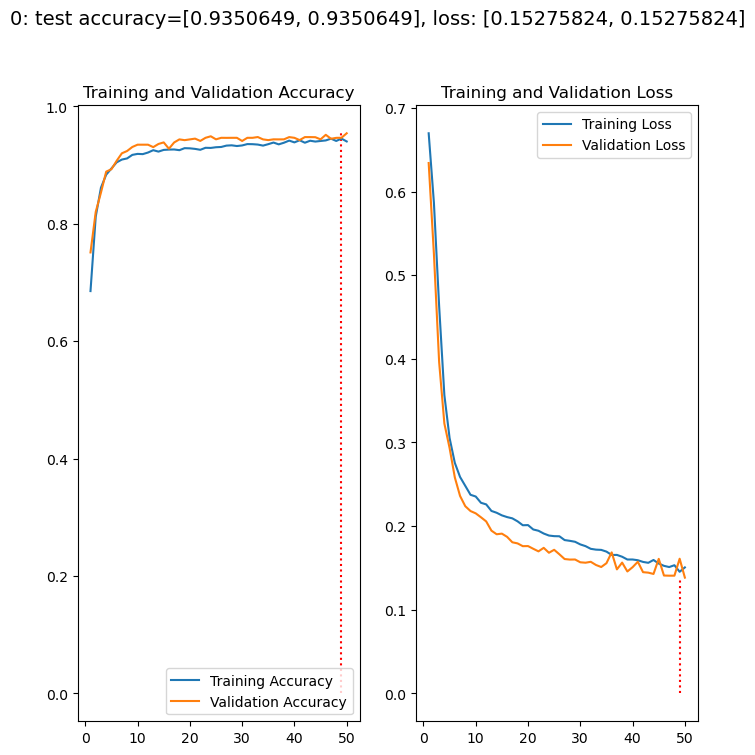

In [5]:
loss_simple, acc_simple = trainer_simple.test()
# Uncomment trainer.plot_performance only if model was fully trained in current notebook
# session: model.history isn't preserved across notebook sessions, thus plotting fails otherwise
trainer_simple.plot_performance("task4_model_simple.png")

***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

# !!! TODO

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [7]:
model_regularized = my_model.MaskClassifier(name="mask_classifier_regularized", img_size=64, dropout=0.5, batch_norm=True)
summary(model_regularized)

Layer (type:depth-idx)                   Param #
MaskClassifier                           --
├─Conv2d: 1-1                            896
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            9,248
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            6,273
├─BatchNorm2d: 1-6                       64
├─BatchNorm2d: 1-7                       64
├─Dropout: 1-8                           --
Total params: 16,545
Trainable params: 16,545
Non-trainable params: 0

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

# !!! TODO

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [9]:
trainer_regularized = my_trainer.Trainer(model_regularized, data_module_simple)

# Comment out trainer.load_model and uncomment trainer.fit to retrain model
#trainer_regularized.load_model()
trainer_regularized.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.86it/s]


Epoch 0 Training: Loss: 0.4729609191417694 Accuracy: 0.7809065580368042
Epoch 0 Validation: Loss: 0.3677847683429718 Accuracy: 0.8856770992279053


Epoch 1: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 1 Training: Loss: 0.27338165044784546 Accuracy: 0.9015281200408936
Epoch 1 Validation: Loss: 0.25144851207733154 Accuracy: 0.9152777791023254


Epoch 2: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.85it/s]


Epoch 2 Training: Loss: 0.23751531541347504 Accuracy: 0.9132612347602844
Epoch 2 Validation: Loss: 0.2019176483154297 Accuracy: 0.9347221851348877


Epoch 3: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.82it/s]


Epoch 3 Training: Loss: 0.21228404343128204 Accuracy: 0.9254521727561951
Epoch 3 Validation: Loss: 0.1841650754213333 Accuracy: 0.9386284351348877


Epoch 4: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 4 Training: Loss: 0.18992048501968384 Accuracy: 0.934838593006134
Epoch 4 Validation: Loss: 0.17135031521320343 Accuracy: 0.9438367486000061


Epoch 5: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 5 Training: Loss: 0.17870844900608063 Accuracy: 0.9328926801681519
Epoch 5 Validation: Loss: 0.1697995662689209 Accuracy: 0.9439236521720886


Epoch 6: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 6 Training: Loss: 0.16670042276382446 Accuracy: 0.9396749138832092
Epoch 6 Validation: Loss: 0.1630009561777115 Accuracy: 0.9478299021720886


Epoch 7: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 7 Training: Loss: 0.15358218550682068 Accuracy: 0.9449690580368042
Epoch 7 Validation: Loss: 0.1620343178510666 Accuracy: 0.949131965637207


Epoch 8: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 8 Training: Loss: 0.1542026549577713 Accuracy: 0.9453411102294922
Epoch 8 Validation: Loss: 0.1439487338066101 Accuracy: 0.9529513716697693


Epoch 9: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 9 Training: Loss: 0.13637448847293854 Accuracy: 0.9530391693115234
Epoch 9 Validation: Loss: 0.14282666146755219 Accuracy: 0.9595486521720886


Epoch 10: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 10 Training: Loss: 0.1351916491985321 Accuracy: 0.9560153484344482
Epoch 10 Validation: Loss: 0.14442412555217743 Accuracy: 0.9543402791023254


Epoch 11: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 11 Training: Loss: 0.12724655866622925 Accuracy: 0.956129789352417
Epoch 11 Validation: Loss: 0.14191468060016632 Accuracy: 0.9556424021720886


Epoch 12: 100%|█████████████████████████████████| 42/42 [00:52<00:00,  1.26s/it]


Epoch 12 Training: Loss: 0.12252315878868103 Accuracy: 0.9587339758872986
Epoch 12 Validation: Loss: 0.13297058641910553 Accuracy: 0.9621527791023254


Epoch 13: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 13 Training: Loss: 0.1178472489118576 Accuracy: 0.9566735625267029
Epoch 13 Validation: Loss: 0.13240602612495422 Accuracy: 0.960850715637207


Epoch 14: 100%|█████████████████████████████████| 42/42 [05:09<00:00,  7.36s/it]


Epoch 14 Training: Loss: 0.1086890697479248 Accuracy: 0.9608516693115234
Epoch 14 Validation: Loss: 0.13349862396717072 Accuracy: 0.960850715637207


Epoch 15: 100%|█████████████████████████████████| 42/42 [01:08<00:00,  1.62s/it]


Epoch 15 Training: Loss: 0.109275683760643 Accuracy: 0.9610519409179688
Epoch 15 Validation: Loss: 0.12944139540195465 Accuracy: 0.9634549021720886


Epoch 16: 100%|█████████████████████████████████| 42/42 [00:59<00:00,  1.42s/it]


Epoch 16 Training: Loss: 0.10340696573257446 Accuracy: 0.9672905206680298
Epoch 16 Validation: Loss: 0.1261311024427414 Accuracy: 0.964756965637207


Epoch 17: 100%|█████████████████████████████████| 42/42 [18:22<00:00, 26.25s/it]


Epoch 17 Training: Loss: 0.10025695711374283 Accuracy: 0.967176079750061
Epoch 17 Validation: Loss: 0.1290920525789261 Accuracy: 0.960850715637207


Epoch 18: 100%|█████████████████████████████████| 42/42 [01:01<00:00,  1.46s/it]


Epoch 18 Training: Loss: 0.09512974321842194 Accuracy: 0.9694082140922546
Epoch 18 Validation: Loss: 0.1225125789642334 Accuracy: 0.9660590291023254


Epoch 19: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 19 Training: Loss: 0.090175561606884 Accuracy: 0.9725846648216248
Epoch 19 Validation: Loss: 0.1277533322572708 Accuracy: 0.9595486521720886


Epoch 20: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 20 Training: Loss: 0.08921876549720764 Accuracy: 0.9694082140922546
Epoch 20 Validation: Loss: 0.11660579591989517 Accuracy: 0.9673611521720886


Epoch 21: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 21 Training: Loss: 0.08520156145095825 Accuracy: 0.970896303653717
Epoch 21 Validation: Loss: 0.12102442234754562 Accuracy: 0.9621527791023254


Epoch 22: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 22 Training: Loss: 0.08115445822477341 Accuracy: 0.9745306968688965
Epoch 22 Validation: Loss: 0.12366780638694763 Accuracy: 0.960850715637207


Epoch 23: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 23 Training: Loss: 0.08007339388132095 Accuracy: 0.9732142686843872
Epoch 23 Validation: Loss: 0.11297517269849777 Accuracy: 0.9673611521720886


Epoch 24: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 24 Training: Loss: 0.07361942529678345 Accuracy: 0.9761046171188354
Epoch 24 Validation: Loss: 0.11857522279024124 Accuracy: 0.964756965637207


Epoch 25: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 25 Training: Loss: 0.07520655542612076 Accuracy: 0.9745306968688965
Epoch 25 Validation: Loss: 0.12361005693674088 Accuracy: 0.9582465291023254


Epoch 26: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 26 Training: Loss: 0.07420151680707932 Accuracy: 0.9742445349693298
Epoch 26 Validation: Loss: 0.12081387639045715 Accuracy: 0.9621527791023254


Epoch 27: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 27 Training: Loss: 0.06503263115882874 Accuracy: 0.9810267686843872
Epoch 27 Validation: Loss: 0.11103367805480957 Accuracy: 0.9673611521720886


Epoch 28: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 28 Training: Loss: 0.06689795106649399 Accuracy: 0.9775069355964661
Epoch 28 Validation: Loss: 0.11330574750900269 Accuracy: 0.9660590291023254


Epoch 29: 100%|█████████████████████████████████| 42/42 [07:23<00:00, 10.56s/it]


Epoch 29 Training: Loss: 0.0668211355805397 Accuracy: 0.9782509803771973
Epoch 29 Validation: Loss: 0.12079102545976639 Accuracy: 0.9621527791023254


Epoch 30: 100%|█████████████████████████████████| 42/42 [13:34<00:00, 19.39s/it]


Epoch 30 Training: Loss: 0.06476534157991409 Accuracy: 0.9798249006271362
Epoch 30 Validation: Loss: 0.12171978503465652 Accuracy: 0.960850715637207


Epoch 31: 100%|█████████████████████████████████| 42/42 [00:25<00:00,  1.64it/s]


Epoch 31 Training: Loss: 0.05955050513148308 Accuracy: 0.9801968932151794
Epoch 31 Validation: Loss: 0.11466044187545776 Accuracy: 0.9673611521720886


Epoch 32: 100%|█████████████████████████████████| 42/42 [00:55<00:00,  1.33s/it]


Epoch 32 Training: Loss: 0.057070158421993256 Accuracy: 0.9805689454078674
Epoch 32 Validation: Loss: 0.12168905884027481 Accuracy: 0.956944465637207


Epoch 33: 100%|█████████████████████████████████| 42/42 [01:14<00:00,  1.77s/it]


Epoch 33 Training: Loss: 0.05936325341463089 Accuracy: 0.9798249006271362
Epoch 33 Validation: Loss: 0.1095244288444519 Accuracy: 0.9660590291023254


Epoch 34: 100%|█████████████████████████████████| 42/42 [18:37<00:00, 26.61s/it]


Epoch 34 Training: Loss: 0.060768596827983856 Accuracy: 0.9780505895614624
Epoch 34 Validation: Loss: 0.10819393396377563 Accuracy: 0.964756965637207


Epoch 35: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.37it/s]


Epoch 35 Training: Loss: 0.05269762873649597 Accuracy: 0.9842891693115234
Epoch 35 Validation: Loss: 0.11448013037443161 Accuracy: 0.960850715637207


Epoch 36: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 36 Training: Loss: 0.050354570150375366 Accuracy: 0.9873511791229248
Epoch 36 Validation: Loss: 0.10822921991348267 Accuracy: 0.9660590291023254


Epoch 37: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 37 Training: Loss: 0.048741426318883896 Accuracy: 0.9877232313156128
Epoch 37 Validation: Loss: 0.10659084469079971 Accuracy: 0.9673611521720886


Epoch 38: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.69it/s]


Epoch 38 Training: Loss: 0.04954537749290466 Accuracy: 0.9850332140922546
Epoch 38 Validation: Loss: 0.10643049329519272 Accuracy: 0.9659721851348877


Epoch 39: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.79it/s]


Epoch 39 Training: Loss: 0.043110862374305725 Accuracy: 0.9887534379959106
Epoch 39 Validation: Loss: 0.12985508143901825 Accuracy: 0.9543402791023254


Epoch 40: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 40 Training: Loss: 0.04310906305909157 Accuracy: 0.9888392686843872
Epoch 40 Validation: Loss: 0.1070077195763588 Accuracy: 0.9660590291023254


Epoch 41: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 41 Training: Loss: 0.04334089905023575 Accuracy: 0.9873511791229248
Epoch 41 Validation: Loss: 0.10745061188936234 Accuracy: 0.9659721851348877


Epoch 42: 100%|█████████████████████████████████| 42/42 [00:20<00:00,  2.02it/s]


Epoch 42 Training: Loss: 0.04154359549283981 Accuracy: 0.9883814454078674
Epoch 42 Validation: Loss: 0.10742668062448502 Accuracy: 0.9699652791023254


Epoch 43: 100%|█████████████████████████████████| 42/42 [00:20<00:00,  2.08it/s]


Epoch 43 Training: Loss: 0.03804103285074234 Accuracy: 0.9903273582458496
Epoch 43 Validation: Loss: 0.10722552984952927 Accuracy: 0.968663215637207


Epoch 44: 100%|█████████████████████████████████| 42/42 [03:01<00:00,  4.32s/it]


Epoch 44 Training: Loss: 0.038734618574380875 Accuracy: 0.988467276096344
Epoch 44 Validation: Loss: 0.1149674728512764 Accuracy: 0.960850715637207


Epoch 45: 100%|█████████████████████████████████| 42/42 [17:24<00:00, 24.88s/it]


Epoch 45 Training: Loss: 0.036358289420604706 Accuracy: 0.9913576245307922
Epoch 45 Validation: Loss: 0.1038782000541687 Accuracy: 0.9698784351348877


Epoch 46: 100%|█████████████████████████████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 46 Training: Loss: 0.03664157912135124 Accuracy: 0.9910714030265808
Epoch 46 Validation: Loss: 0.10911181569099426 Accuracy: 0.964756965637207


Epoch 47: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 47 Training: Loss: 0.038267482072114944 Accuracy: 0.9899553656578064
Epoch 47 Validation: Loss: 0.10620129108428955 Accuracy: 0.9685763716697693


Epoch 48: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.48it/s]


Epoch 48 Training: Loss: 0.03526967391371727 Accuracy: 0.991815447807312
Epoch 48 Validation: Loss: 0.11069194227457047 Accuracy: 0.9674479365348816


Epoch 49: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.72it/s]


Epoch 49 Training: Loss: 0.038121793419122696 Accuracy: 0.9906994104385376
Epoch 49 Validation: Loss: 0.1177980899810791 Accuracy: 0.9635416865348816


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

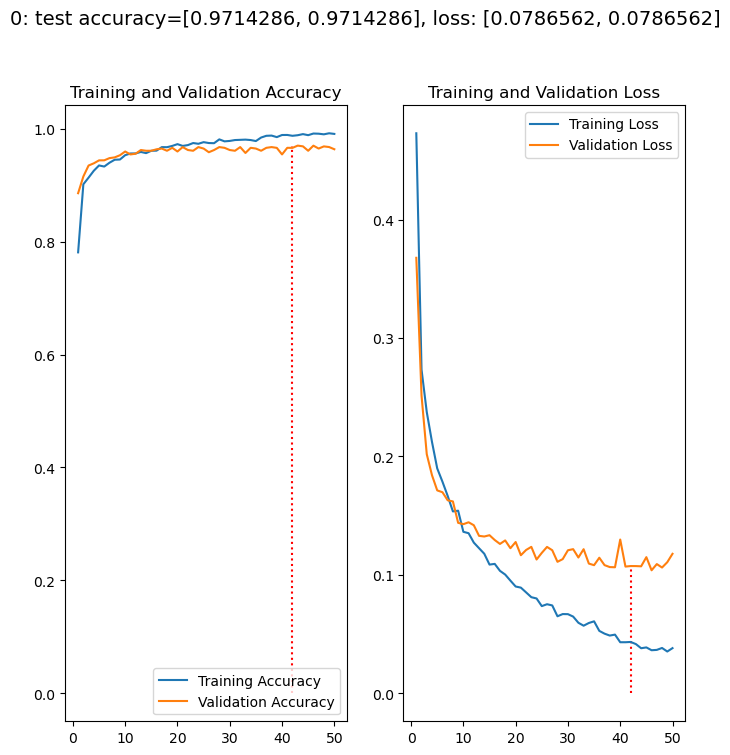

In [10]:
loss_regularized, acc_regularized = trainer_regularized.test()
# Uncomment trainer.plot_performance only if model was fully trained in current notebook
# session: model.history isn't preserved across notebook sessions, thus plotting fails otherwise
trainer_regularized.plot_performance("task4_model_regularized.png")

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


### I don't know if the results make sense? Maybe batchnorm needs to be placed differently?

# !!! TODO

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

In [11]:
data_module_augmented = my_datamodule.DataModule(img_size=64, batch_size=64, augmented=True)

#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



Total convolutional layers: 2
Total convolutional layers: 2


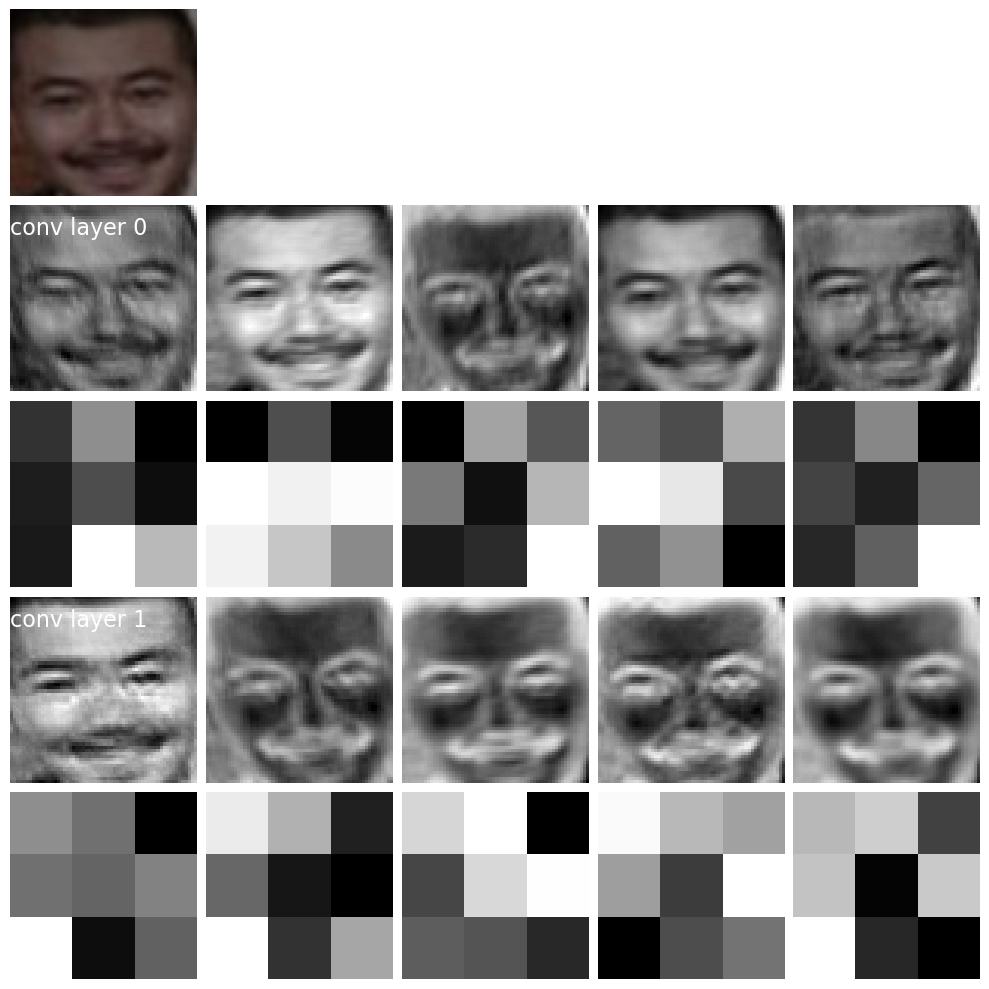

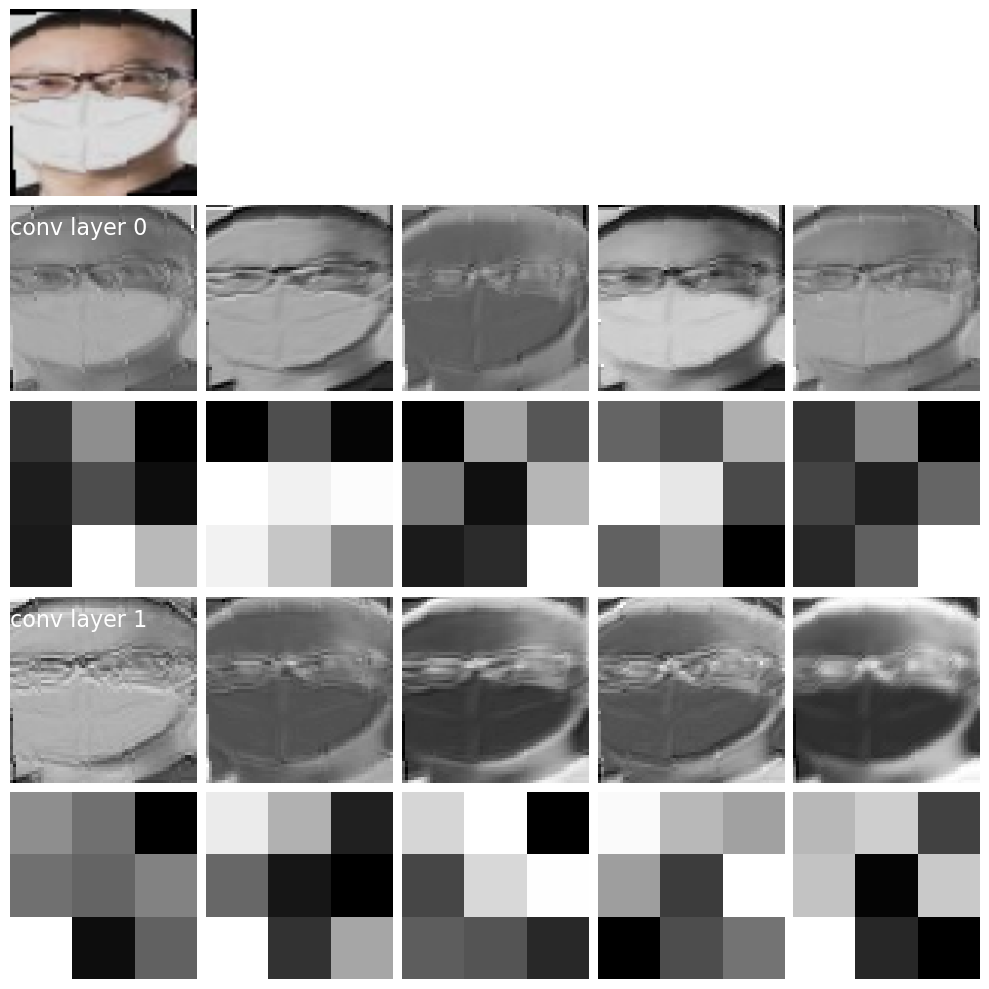

In [15]:
model_augmented = my_model.MaskClassifier(name="mask_classifier_augmented", img_size=64, dropout=0.6, batch_norm=True)

sample_face, sample_mask = data_module_augmented.train_dataset[0][0], data_module_augmented.train_dataset[2544][0]
utils.plot_activation_maps(model_augmented, sample_face, name="task4_mask_activation_maps_before.png")
utils.plot_activation_maps(model_augmented, sample_mask, name="task4_face_activation_maps_before.png")

#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

In [16]:
trainer_augmented = my_trainer.Trainer(model_augmented, data_module_augmented)

# Comment out trainer.load_model and uncomment trainer.fit to retrain model
#trainer_augmented.load_model()
trainer_augmented.fit(epochs=100, lr=0.0007)

Epoch 0:  83%|████████████████████████████▎     | 35/42 [00:09<00:01,  3.66it/s]


KeyboardInterrupt: 

#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.


***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

In [ ]:
loss_augmented, acc_augmented = trainer_simple.test()
# Uncomment trainer.plot_performance only if model was fully trained in current notebook
# session: model.history isn't preserved across notebook sessions, thus plotting fails otherwise
trainer_augmented.plot_performance()

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

# !!! TODO

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

In [ ]:
utils.plot_activation_maps(model_augmented, sample_face, name="task4_mask_activation_maps_before.png")
utils.plot_activation_maps(model_augmented, sample_mask, name="task4_face_activation_maps_before.png")

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


### I don't think the augmentation is correct, I see no differences between augmented conv-layers and unaugmented and the accuracy is bad?

# !!! TODO

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

In [ ]:
# !!! TODO

***
#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness. 


# !!! TODO